In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import os
import sys

from collections import deque
from env import SimpleAmpEnv
from DQNagent import DQNagent



Bad key text.latex.unicode in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug           : False')
You pr

In [2]:
# Change clab to True if using google colaboratory
clab = False

if clab:
    from tensorflow.keras.utils import plot_model


In [3]:
# Initialize environment
env = SimpleAmpEnv(ideal=False, reward_type="AutoCkt")
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

# Check the Input layer size, and Output layer size
print(f"Input_Layer size: {state_size}")
print(f"Output_Layer size: {action_size}")

Input_Layer size: 3
Output_Layer size: 3


/Users/lab2020/opt/anaconda3/envs/learning/lib/python3.7/site-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


In [4]:
agent = DQNagent(state_size, action_size)
agent.main_model.summary()
agent.target_model.summary()
if clab:
    plot_model(agent.main_model, show_shapes=True)


2022-03-02 15:41:58.420164: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-02 15:41:58.420555: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 4,611
Trainable params: 4,611
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
________________________________

In [5]:
scores = []

In [10]:
# Main loop (or Traning Loop for 10 episodes)

num_episodes = 100


for episode in range(num_episodes):

    print(f"Episode {episode+1}(starting epsilon: {agent.epsilon}):")
    done = False
    step = 0 
    score = []
    state = np.reshape(env.reset(), [1, state_size])

    while not done:
        step += 1 
        action = agent.get_action(state)
        next_state, reward, done, info = env.step(action)
        next_state = np.reshape(next_state, [1, state_size])
        agent.append_sample(state, action, reward, next_state, done)
        score.append(reward)

        if (len(agent.memory) >= agent.train_start) & (step % 32 == 0):
            agent.train_model()

        if (step+1) % 100 == 0 :
            # print(f"step: {step}, Current: {env.current_id:.4f} action: {action}, epsilon: {agent.epsilon:.4f}")
            agent.update_target_model()

        state = next_state

        if done:
            result = np.average(score) 
            scores.append(result)
        


Episode 1(starting epsilon: 0.09910481551887473):
Episode 2(starting epsilon: 0.09910481551887473):
Episode 3(starting epsilon: 0.09910481551887473):
Episode 4(starting epsilon: 0.09910481551887473):
Episode 5(starting epsilon: 0.09910481551887473):
Episode 6(starting epsilon: 0.09910481551887473):
Episode 7(starting epsilon: 0.09910481551887473):
Episode 8(starting epsilon: 0.09910481551887473):
Episode 9(starting epsilon: 0.09910481551887473):
Episode 10(starting epsilon: 0.09910481551887473):
Episode 11(starting epsilon: 0.09910481551887473):
Episode 12(starting epsilon: 0.09910481551887473):
Episode 13(starting epsilon: 0.09910481551887473):
Episode 14(starting epsilon: 0.09910481551887473):
Episode 15(starting epsilon: 0.09910481551887473):
Episode 16(starting epsilon: 0.09910481551887473):
Episode 17(starting epsilon: 0.09910481551887473):
Episode 18(starting epsilon: 0.09910481551887473):
Episode 19(starting epsilon: 0.09910481551887473):
Episode 20(starting epsilon: 0.099104815

In [8]:
# Prediction outputs... (even though it is not correct yet)
test_state = np.reshape(env.reset(), [1, state_size])
test_q_values = agent.main_model.predict(test_state)
action_choice = np.argmax(test_q_values)
print(env.current_id)
print(test_q_values)
print(action_choice)

0.128
[[-30.387733 -30.627611 -30.694618]]
0


In [24]:
test_states = np.arange(1, 300) * 0.001
test_states[0]
test_gbp = env._circuit_topology(test_states[0])[-1]
test_gbp_target = env.gbp_target
test_input = np.array([test_states[0], test_gbp, test_gbp_target])

In [25]:
test_input_norm = env.normalize_target(test_input)
test_input_norm

array([0.00333333, 0.10101015, 0.5       ], dtype=float32)

In [ ]:
test_states = np.arange(1, 300)
input_stack = []
q_stack = []
predictions = []

for i in range(len(test_states)):
    test_gbp = env._circuit_topology(test_states[i]*1e-3)[-1]
    test_gbp_target = env.gbp_target
    test_input = np.array([test_states[i]*1e-3, test_gbp, test_gbp_target])
    input_stack.append(test_input)
    test_input_norm = np.reshape(env.normalize_target(test_input), [1, state_size])
    test_q_values = agent.main_model.predict(test_input_norm)
    q_stack.append(test_q_values)
    print(f"current_id: {test_states[i]*1e-3:.4f}, action_prediction: {np.argmax(test_q_values)}")
    predictions.append(np.argmax(test_q_values))

input_stack = np.array(input_stack)
q_stack = np.array(q_stack)

In [ ]:
input_stack

In [55]:
x = []

for i in range(10):
    x.append(i)
    if i == 9:
        score = np.average(x)

print(score)

4.5


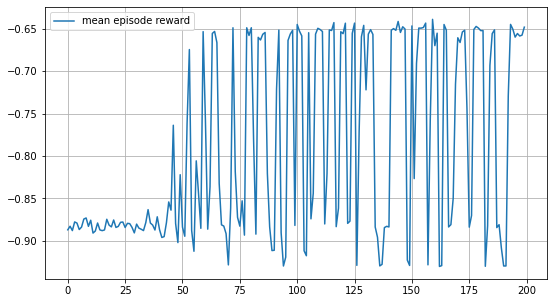

In [12]:
plt.figure(figsize=(9, 5))
plt.plot(scores, label="mean episode reward")
plt.legend()
plt.grid()


In [29]:
os.mkdir("./trained_model/")
agent.main_model.save("./trained_model/main_model.h5")